# EDA part 2 Studio

## Further Analysis of IMDB movies

In this studio, we're returning to this [tutorial](https://towardsdatascience.com/understand-the-data-with-univariate-and-multivariate-charts-and-plots-in-python-3b9fcd68cd8) as a reference guide for our EDA.
You've seen the data set before and you've worked through similar kinds of questions with the heart disease dataset. 

Blocks have been created for your code and we've asked you to add more in some places.

The dataset from [Kaggle](https://www.kaggle.com/PromptCloudHQ/imdb-data)

### 1. Find the relative proportions of movie genres represented.

In [1]:
# import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px

# create your data variabe using .read_csv 

# get reaquainted with the data by viewing the first 5 rows

In [ ]:
#pd.set_option('display.max_rows', None) 
#run more rows than what is usually shown. See all rows

In [2]:
df=pd.read_csv('IMDB-Movie-Data.csv')

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
# list the column names
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [5]:
# preview the contents of the 'Genre' column only
df['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [6]:
df['Genre'].head()

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object

In [7]:
# using the .value_counts() method, explore the number of each genre type in the series
# assign the result to a variable called genre_counts

genre_counts=df['Genre'].value_counts()

genre_counts


Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Drama,Romance,War           1
Action,Horror               1
Biography,Drama,Mystery     1
Comedy,Horror,Sci-Fi        1
Drama,Fantasy,Thriller      1
Name: Genre, Length: 207, dtype: int64

In [8]:
#df['Genre'].tail(25)

In [9]:
# Find the proportions of each genre by dividing your variable assigned above by the sum of all of the unique genre values
# assign this to the variable genre_proportions

genre_proportions= genre_counts/genre_counts.sum()

genre_proportions

Action,Adventure,Sci-Fi    0.050
Drama                      0.048
Comedy,Drama,Romance       0.035
Comedy                     0.032
Drama,Romance              0.031
                           ...  
Drama,Romance,War          0.001
Action,Horror              0.001
Biography,Drama,Mystery    0.001
Comedy,Horror,Sci-Fi       0.001
Drama,Fantasy,Thriller     0.001
Name: Genre, Length: 207, dtype: float64

In [30]:
genre_proportions.sum()

1.0000000000000002

In [10]:
genre_proportions*100

Action,Adventure,Sci-Fi    5.0
Drama                      4.8
Comedy,Drama,Romance       3.5
Comedy                     3.2
Drama,Romance              3.1
                          ... 
Drama,Romance,War          0.1
Action,Horror              0.1
Biography,Drama,Mystery    0.1
Comedy,Horror,Sci-Fi       0.1
Drama,Fantasy,Thriller     0.1
Name: Genre, Length: 207, dtype: float64

In [11]:
# the length of results a above is too long to know if there are any null values present
# we can run .isna() on the series and collect the sum to check if there are missing values
# uncomment the line below to see the results

(df['Genre'].isna().sum())


0

In [12]:
# use .head() on genre_proportions to get a better look at the top 20 
# remember: .head() can take a parameter to display more than 5 entries 

genre_proportions.head(20)*100

Action,Adventure,Sci-Fi       5.0
Drama                         4.8
Comedy,Drama,Romance          3.5
Comedy                        3.2
Drama,Romance                 3.1
Action,Adventure,Fantasy      2.7
Comedy,Drama                  2.7
Animation,Adventure,Comedy    2.7
Comedy,Romance                2.6
Crime,Drama,Thriller          2.4
Crime,Drama,Mystery           2.3
Action,Adventure,Drama        1.8
Action,Crime,Drama            1.7
Horror,Thriller               1.6
Drama,Thriller                1.5
Action,Adventure,Comedy       1.4
Adventure,Family,Fantasy      1.4
Biography,Drama               1.4
Biography,Drama,History       1.4
Action,Crime,Thriller         1.2
Name: Genre, dtype: float64

### 2. Find the minimum, maximum, average, and standard deviation of revenue data.

In [13]:
# use .describe() on the revenue column to see some summary statistics of the revenue data present

df['Revenue (Millions)'].describe()


count    872.000000
mean      82.956376
std      103.253540
min        0.000000
25%       13.270000
50%       47.985000
75%      113.715000
max      936.630000
Name: Revenue (Millions), dtype: float64

In [14]:
(df['Revenue (Millions)'].isna().sum())

128

Do we have any missing revenue entries?
Add a new code cell below this and use ``.isna()`` on the column to check.
Ask yourself: does this affect the results of ``.describe()``?
Hint: look at the count result above and compare that with the ``Length`` returned with ``.isna()``

### 3. Make a plot distribution of the revenue data.


<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Count'>

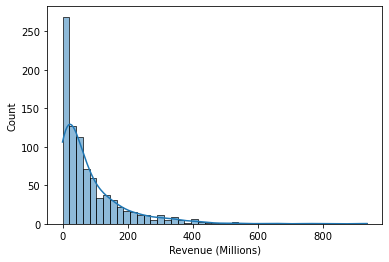

In [15]:
# use sns.histplot to get a birds eye view of the revenue distribution
# Note: the refernce article plots Cholesterol data with ``distplot`` but we recieve 
# a deprecation warning so we've switched it with ``histplot``. The resulting graph is 
# virtually the same.

sns.histplot(data=df, x="Revenue (Millions)", kde=True)

<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Count'>

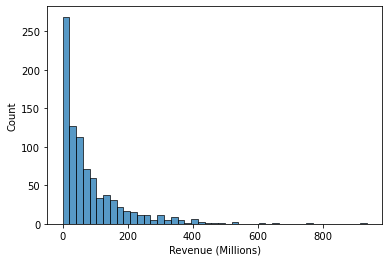

In [32]:
sns.histplot(df['Revenue (Millions)'].dropna())

The histogram(which is positively skewed) shows that the majority of movie revenues fall in the lower revenue range(between 0 to 150 million give or take, while fewer movies make higher revenues)

Look back at your ``.describe()`` results above. Does this plotted distribution match the results of the 25%, 50%, and 75% percentile data?

Create another code cell below this and make another histplot but with only the top 20 items in the revenue column. Run ``.describe()`` on the top 20 to again check the percentile distributions with what the graph displays.

In [17]:
top20=df['Revenue (Millions)'].head(20).describe()

top20

count     19.000000
mean     180.743158
std      138.787767
min        2.870000
25%       83.565000
50%      151.060000
75%      259.535000
max      532.170000
Name: Revenue (Millions), dtype: float64

### 4. Find the % of movies with a higher than avergage Rating

In [18]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [19]:
# create a variable called mean_rating.
# assign mean_rating the result of running ``.mean()`` on the rating column.
mean_rating=df.Rating.mean()

mean_rating

6.723200000000003

In [20]:
# Find the dataset where a movie's rating is higher than mean_rating. 
# Divide that by the length of the total dataset.

len(df[df["Rating"] > mean_rating])/len(df)


0.513

In [21]:
df[((df['Year'] >= 2010) & (df['Year'] <= 2016))
      & (df['Rating'] > mean_rating)
      & (df['Revenue (Millions)'] < df['Revenue (Millions)'].quantile(0.25))]

#Movies with ratings greater than mean rating with rev in 25th percentile

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
31,32,Nocturnal Animals,"Drama,Thriller",A wealthy art gallery owner is haunted by her ...,Tom Ford,"Amy Adams, Jake Gyllenhaal, Michael Shannon, A...",2016,116,7.5,126030,10.64,67.0
43,44,The Founder,"Biography,Drama,History","The story of Ray Kroc, a salesman who turned t...",John Lee Hancock,"Michael Keaton, Nick Offerman, John Carroll Ly...",2016,115,7.2,37033,12.79,66.0
46,47,Miss Sloane,"Drama,Thriller",In the high-stakes world of political power-br...,John Madden,"Jessica Chastain, Mark Strong, Gugu Mbatha-Raw...",2016,132,7.3,17818,3.44,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
953,954,The Kings of Summer,"Adventure,Comedy,Drama","Three teenage friends, in the ultimate act of ...",Jordan Vogt-Roberts,"Nick Robinson, Gabriel Basso, Moises Arias,Nic...",2013,95,7.2,65653,1.29,61.0
960,961,Trance,"Crime,Drama,Mystery",An art auctioneer who has become mixed up with...,Danny Boyle,"James McAvoy, Rosario Dawson, Vincent Cassel,D...",2013,101,7.0,97141,2.32,61.0
967,968,The Walk,"Adventure,Biography,Crime","In 1974, high-wire artist Philippe Petit recru...",Robert Zemeckis,"Joseph Gordon-Levitt, Charlotte Le Bon,Guillau...",2015,123,7.3,92378,10.14,NaN
974,975,Queen of Katwe,"Biography,Drama,Sport",A Ugandan girl sees her world rapidly change a...,Mira Nair,"Madina Nalwanga, David Oyelowo, Lupita Nyong'o...",2016,124,7.4,6753,8.81,73.0


In [22]:
df[(df['Rating'] > 8) & (df['Revenue (Millions)'] <= df['Revenue (Millions)'].quantile(0.25))]

#Ratings greater than 8 with Rev in 25th percentile



,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
96,97,Kimi no na wa,"Animation,Drama,Fantasy",Two strangers find themselves linked in a biza...,Makoto Shinkai,"Ryûnosuke Kamiki, Mone Kamishiraishi, Ryô Nari...",2016,106,8.6,34110,4.68,79.0
117,118,Dangal,"Action,Biography,Drama",Former wrestler Mahavir Singh Phogat and his t...,Nitesh Tiwari,"Aamir Khan, Sakshi Tanwar, Fatima Sana Shaikh,...",2016,161,8.8,48969,11.15,NaN
133,134,Whiplash,"Drama,Music",A promising young drummer enrolls at a cut-thr...,Damien Chazelle,"Miles Teller, J.K. Simmons, Melissa Benoist, P...",2014,107,8.5,477276,13.09,88.0
145,146,Ah-ga-ssi,"Drama,Mystery,Romance",A woman is hired as a handmaiden to a Japanese...,Chan-wook Park,"Min-hee Kim, Jung-woo Ha, Jin-woong Jo, So-ri ...",2016,144,8.1,33418,2.01,84.0
249,250,The Intouchables,"Biography,Comedy,Drama",After he becomes a quadriplegic from a paragli...,Olivier Nakache,"François Cluzet, Omar Sy, Anne Le Ny, Audrey F...",2011,112,8.6,557965,13.18,57.0
430,431,3 Idiots,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
455,456,Jagten,Drama,"A teacher lives a lonely life, all the while s...",Thomas Vinterberg,"Mads Mikkelsen, Thomas Bo Larsen, Annika Wedde...",2012,115,8.3,192263,0.61,76.0
476,477,The Lives of Others,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
608,609,Mommy,Drama,"A widowed single mother, raising her violent s...",Xavier Dolan,"Anne Dorval, Antoine-Olivier Pilon, Suzanne Cl...",2014,139,8.1,33560,3.49,74.0


### 5. Plot the rating data against genre to observe the difference in score in different movie types

In [23]:
# run describe on the rating column
df['Rating'].describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

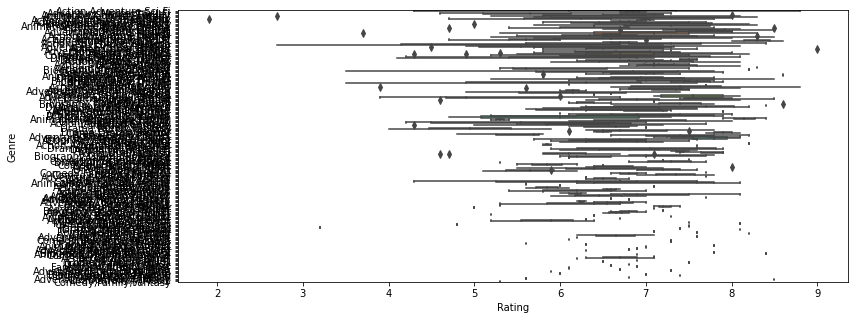

In [24]:
# Plot the rating data against genres
# First, lets mirror what our reference article plots

plt.figure(figsize=(12,5))
sns.boxplot(x = "Rating", y = "Genre", data=df)

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

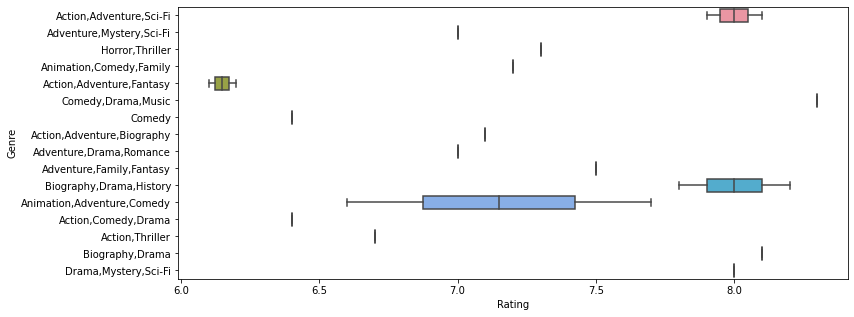

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(x = "Rating", y = "Genre", data=df.head(20))

That graph isn't very helpful! 
Create a new code cell below this and create the same plot, but this time for data used,
use only the first 20 entries.
Do you find that any easier to read and interpret?
Next, create one more cell. Use the same axes and the top 20 items in the data, but plot using ``sns.scatterplot()``. Do you learn anything different between the boxplot and the scatterplot?

<AxesSubplot:xlabel='Rating', ylabel='Genre'>

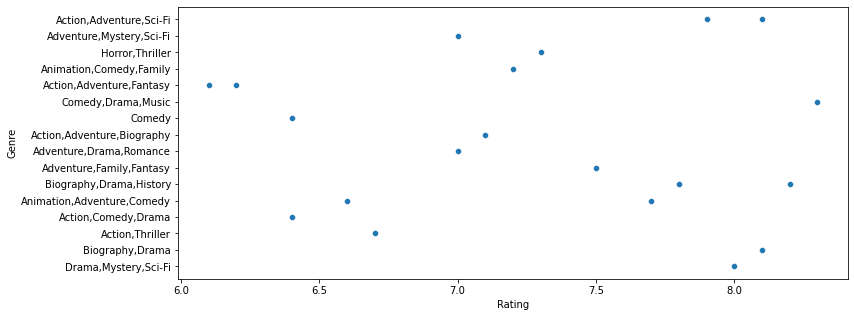

In [26]:
plt.figure(figsize=(12,5))
sns.scatterplot(x = "Rating", y = "Genre", data=df.head(20))

### 6. Make a chart to show the number of films in each rating group each year

In [27]:
# Create a new column called rating_group
# Use pd.cut() to bin(group) the rating_group column values by integer intervals 1-10
df["rating_group"]=pd.cut(df.Rating, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [28]:
# Make a chart to show the number of films in each rating group per year

df.groupby('Year')["rating_group"].value_counts().unstack()


rating_group,"(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]","(7, 8]","(8, 9]"
Year,,,,,,,,
2006,NaN,NaN,NaN,NaN,4.0,18.0,18.0,4.0
2007,NaN,NaN,NaN,1.0,4.0,11.0,32.0,5.0
2008,1.0,NaN,NaN,1.0,6.0,22.0,19.0,3.0
2009,NaN,1.0,NaN,1.0,7.0,16.0,21.0,5.0
2010,NaN,NaN,NaN,3.0,7.0,25.0,20.0,5.0
2011,NaN,NaN,NaN,2.0,8.0,25.0,24.0,4.0
2012,NaN,NaN,NaN,NaN,8.0,27.0,25.0,4.0
2013,NaN,NaN,NaN,3.0,10.0,42.0,32.0,4.0
2014,NaN,NaN,NaN,NaN,19.0,38.0,31.0,10.0


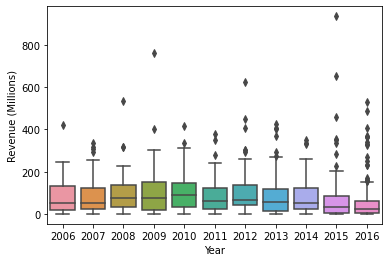

In [29]:
sns.boxplot(data=df,x='Year', y='Revenue (Millions)')
plt.show()

Each year, which rating range(s) is the most concentrated? Does this match your results from the box and scatter plots above?